# **Independent Project Planning**

**November 10th, 2025**

In [49]:
#import packages
library(tidyverse)
library(tidymodels)
library(repr)

**Data Description**

The data sets used in this project are derived from player information and timestamp session logs from a Minecraft server at UBC. players.csv lists a record of different players using different forms of identifiers. sessions.csv lists each player’s start and end times. There are 11 variables across the two data sets. 

Data were collected by logging players who joined a UBC Minecraft server. The server automatically records players' gameplay start/end times in UTC (Coordinated Universal Time) while storing player identifiers, including their play name, age, and gender. Hashed emails are also collected, which serve as an anonymized player ID.

There are inconsistencies in the players.csv data that can be seen directly. For example, there are countless sessions with zero durations. This could be indicative of a disconnection from the server or issues with logging start and end times. This affects our data because it has the potential to inflate session counts, which can subsequently impact estimations of game play concurrency if counted as real sessions. Additionally, many of these players, who have supposedly logged zero cumulative hours, have reached pro or even veteran status. This is inconsistent with their playtime and suggests that hours have been mislogged. 

A potential indirect issue associated with the data is the use of shared accounts. Shared accounts have the potential to impact the accuracy of data, particularly in terms of experience level. This is because activity from multiple people is merged under one account.

|Variable Name |Data Type|Description|
|--------------|---------|------------|
|experience    |chr      |Reported Minecraft experience level per player|
|subscribe     |lgl      |Newsletter opt-in for each player (TRUE/FALSE)|
|hashedEmail   |chr      |Anonymized email address specific to each player|
|played_hours  |dbl      |Total number of hours each player has played|
|name          |chr      |Chosen display name of Minecraft player|
|gender        |chr      |Self-reported gender of each player|
|Age           |dbl      |Age of each player (in years)|
|start_time    |dttm     |Session start timestamp in UTC|
|end_time      |dttm     |Session end timestamp in UTC|
|original_start_time  |dttm     |Unmodified start timestamp recorded by the server (UTC)|
|original_end_time    |dttm     |Unmodified end timestamp recorded by the server (UTC)|

**Question**

The broad question being addressed in this proposal is an insight into demand forecasting. Specifically, looking at the time windows that are the most likely to hold the largest number of simultaneous players. Based on this broad question, I narrowed its focus and created a new question: Can the hour of the day and the day of the week predict the number of sessions started on the Minecraft server per hour? Although this question does not directly address the concurrency of users on the Minecraft server, it indirectly achieves this goal as the number of sessions started per hour is strongly correlated with spikes in simultaneous play. High-traffic hours have many start times and overlapping sessions. Using the sessions.csv data, I will parse the start_time column to hourly timestamps and calculate the number of sessions per hour. Using the hourly timestamps, I will derive the predictors hour_of_day and day_of_week. This will generate a tidy hourly table.

**Exploratory Data Analysis and Visualization**

In [50]:
#read in and wrangle data
players_summary <- read_csv("Data/players.csv", show_col_types = FALSE) |>
mutate(experience = factor(experience),
gender = factor(gender),
subscribe = factor(subscribe))
players_summary

sessions_summary <- read_csv("Data/sessions.csv", show_col_types = FALSE) |>
mutate(start_time = factor(start_time),
end_time = factor(end_time),
original_start_time = factor(original_start_time),
original_end_time = factor(original_end_time ))
players_summary

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<fct>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [51]:
#summarize data
players_numeric_summary <- players_summary |>
summarize(min_Age = min(Age, na.rm = TRUE), max_Age = max(Age, na.rm =TRUE), 
mean_Age = mean(Age, na.rm = TRUE),
min_played_hours = min(played_hours, na.rm = TRUE),
max_played_hours = max(played_hours, na.rm = TRUE), mean_played_hours =
mean(played_hours, na.rm = TRUE))
players_numeric_summary

min_Age,max_Age,mean_Age,min_played_hours,max_played_hours,mean_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.13918,0,223.1,5.845918


Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `original_start_time = dmy_hm(as.character(original_start_time),
  tz = "UTC")`.
Caused by warning:
! All formats failed to parse. No formats found.
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


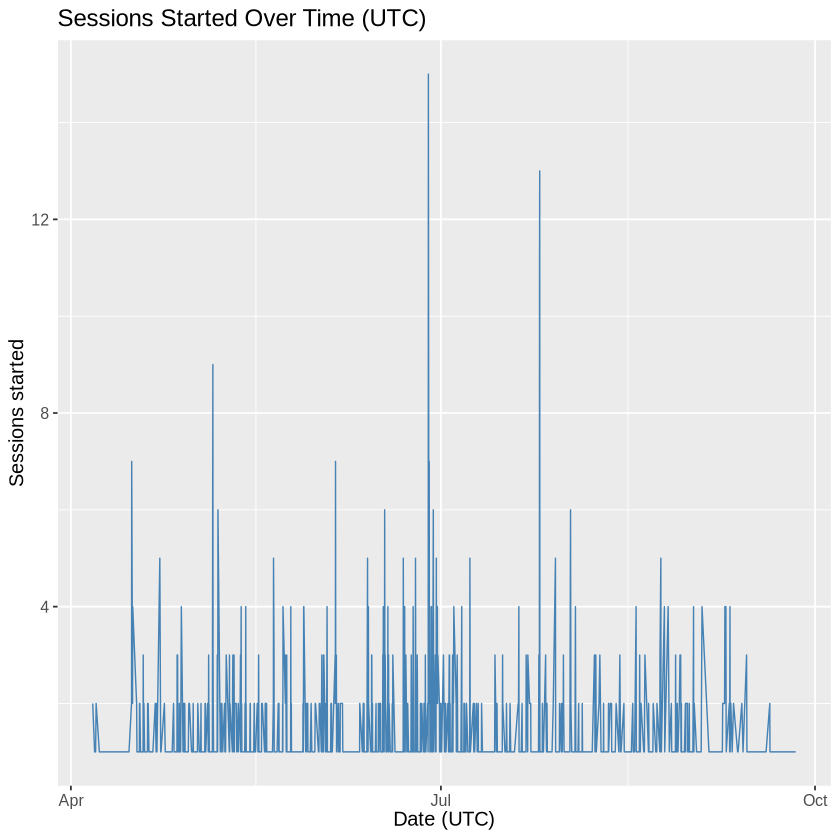

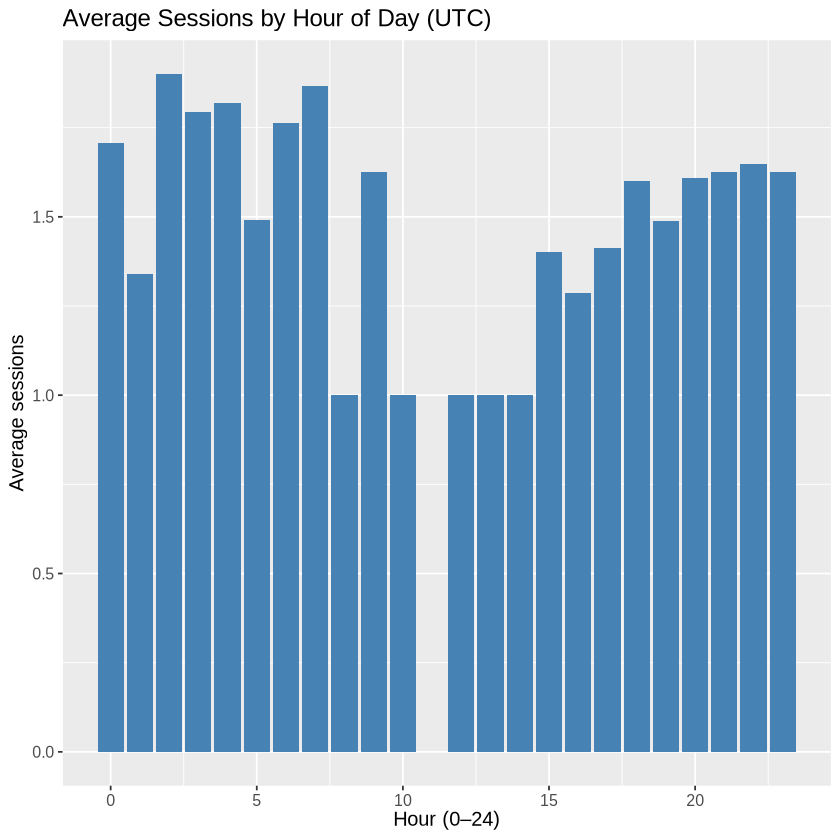

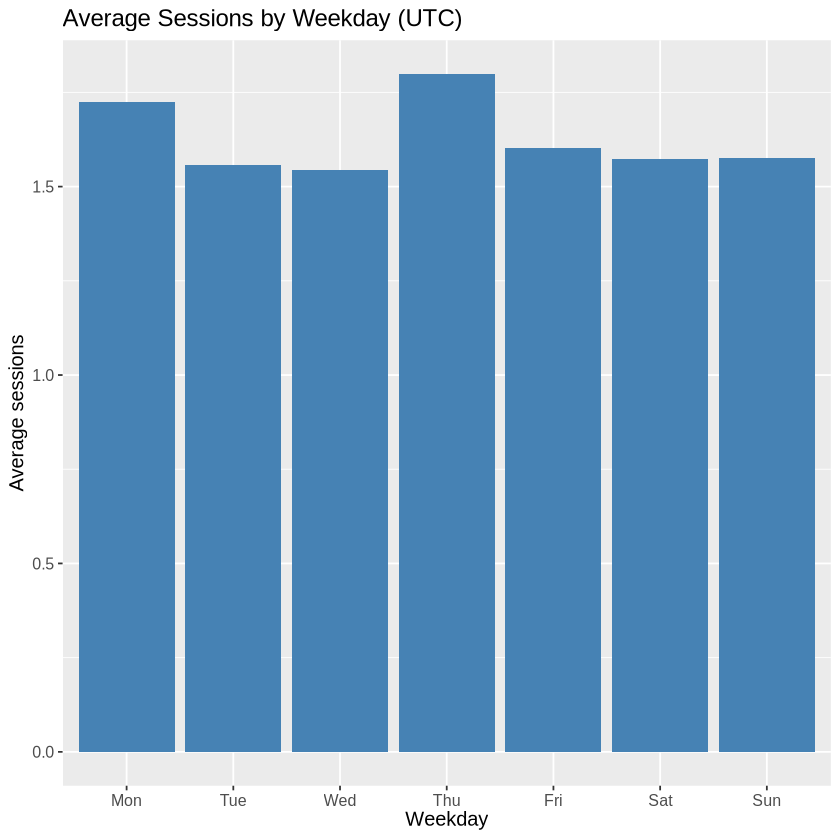

In [52]:
#exploratory visualizations of the data
#sessions started per hour
sessions_summary <- sessions_summary |>
  mutate(
    start_time          = dmy_hm(as.character(start_time), tz = "UTC"),
    end_time            = dmy_hm(as.character(end_time), tz = "UTC"),
    original_start_time = dmy_hm(as.character(original_start_time), tz = "UTC"),
    original_end_time   = dmy_hm(as.character(original_end_time), tz = "UTC"))

sessions_per_hour <- sessions_summary |>
  mutate(
    start_hour  = floor_date(start_time, "hour"),
    hour_of_day = hour(start_time),
    wday_label  = wday(start_time, label = TRUE, abbr = TRUE, week_start = 1)) |>
    drop_na(start_hour) |>                              
    count(start_hour, hour_of_day, wday_label, name = "sessions_started") |>
  arrange(start_hour)

#line plot of spikes in players in the server
sessions_plot <- ggplot(sessions_per_hour, aes(x = start_hour, y = sessions_started)) +
  geom_line(color = "steelblue", linewidth = 0.4) +
  ggtitle("Sessions Started Over Time (UTC)") +
  xlab("Date (UTC)") +
  ylab("Sessions started") +
  theme(text = element_text(size = 12))

sessions_plot

#bar plot of average by hour of day
avg_by_hour <- sessions_per_hour |>
  group_by(hour_of_day) |>
  summarise(mean_sessions = mean(sessions_started, na.rm = TRUE))

avg_hour_plot <- ggplot(avg_by_hour, aes(x = hour_of_day, y = mean_sessions)) +
  geom_col(fill = "steelblue") +
  ggtitle("Average Sessions by Hour of Day (UTC)") +
  xlab("Hour (0–24)") +
  ylab("Average sessions") +
  theme(text = element_text(size = 12))
avg_hour_plot

#bar plot of average by weekday
avg_by_wday <- sessions_per_hour |>
  group_by(wday_label) |>
  summarise(mean_sessions = mean(sessions_started, na.rm = TRUE))

avg_wday_plot <- ggplot(avg_by_wday, aes(x = wday_label, y = mean_sessions)) +
  geom_col(fill = "steelblue") +
  ggtitle("Average Sessions by Weekday (UTC)") +
  xlab("Weekday") +
  ylab("Average sessions") +
  theme(text = element_text(size = 12))
avg_wday_plot

**Relevant Insights**

Plot 1: The line plot displays irregular date-level spikes in sessions, with a notable outlier in July. This suggests the need to aggregate data by hour and weekday to identify stable patterns in player traffic.

Plot 2: Traffic peaks in the late night/early morning and again in the evening. There is a clear dip in online users from late morning to early afternoon. 

Plot 3: Weekday differences are minimal. We see our most significant increase in users on Thursday, and Wednesday has the lowest traffic. 

**Main takeaway from the graphs above is that predicting the sessions started per hour should predominantly be based on data from the hour of the day rather than the day of the week.**